In [108]:
clear;
close all;
clc;

### Plotting data

Plotting data


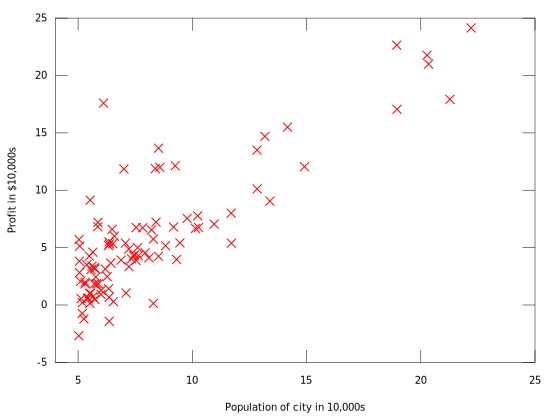

In [109]:
disp('Plotting data')
data = load('ex1data1.txt');
x = data(:, 1);
y = data(:, 2);
plot(x, y, 'rx', 'MarkerSize', 3);
axis([4, 25])
xlabel('Population of city in 10,000s');
ylabel('Profit in $10,000s')

### Gradient Descent

In [110]:
% Cost function
function J = computeCost(X, y, theta)
    m = length(y);
    diff = (X * theta - y);
    J = (diff' * diff) / (2 * m);
end

In [111]:
% Gradient Descent
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(num_iters, 1);
    
    for i = 1:num_iters
        % update theta
        diff = X * theta - y;
        theta = theta - alpha * X' * diff / m;
        J_history(i) = computeCost(X, y, theta);
    end
end 

In [112]:
m = length(y);
X = [ones(m, 1), x];
theta = zeros(2, 1);
num_iters = 1500;
alpha = 0.01;
computeCost(X, y, theta)

ans =  32.073


In [123]:
[theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters);
theta
computeCost(X, y, theta)
predict1 = [1, 3.5] * theta;
printf('For population = 35,000, we predict a profit of %f\n', predict1 * 10000);
predict2 = [1, 7] * theta;
printf('For population = 70,000, we predict a profit of %f\n', predict2 * 10000);

theta =

  -3.8946
   1.1929

ans =  4.4770
For population = 35,000, we predict a profit of 2806.045736
For population = 70,000, we predict a profit of 44558.060147


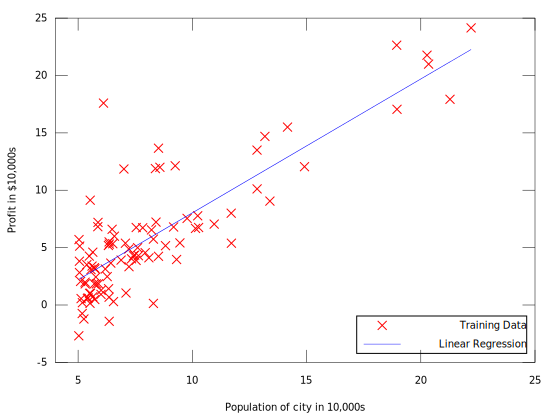

In [114]:
% Plot the Linear Regression Line
plot(x, y, 'rx', 'MarkerSize', 3);
hold on;
plot(x, X * theta, '-');
axis([4, 25]);
xlabel('Population of city in 10,000s');
ylabel('Profit in $10,000s')
legend('Training Data', 'Linear Regression', 'location', 'southeast');


### Visualizing J(θ)

In [115]:
theta

theta =

  -3.6303
   1.1664



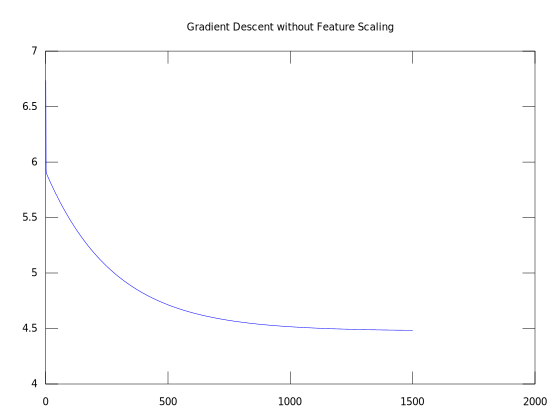

In [121]:
% plog cost function
plot(1:1500, J_history)
title('Gradient Descent without Feature Scaling')

从 theta 的最终取值，我们可以画一下 J(theta) 的图像.

In [117]:
% 指定我们要绘制的区间。如果 feature scaling 过后，linspace 可能一致。
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);
J_vals = zeros(length(theta0_vals), length(theta1_vals)); % 100 * 100

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
        t = [theta0_vals(i); theta1_vals(j)];
        J_vals(i, j) = computeCost(X, y, t);
    end
end

size(J_vals)
% Surface plot
figure
surf(theta0_vals, theta1_vals, J_vals)

ans =

   100   100



In [119]:
% J_vals transpose 做一下翻转
figure
surf(theta0_vals, theta1_vals, J_vals')

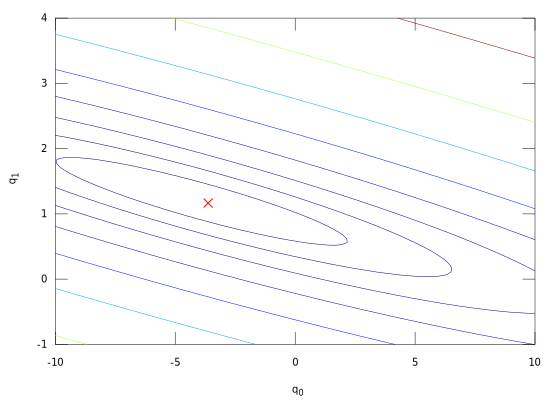

In [120]:
figure
% 要用 J_vals 的转置，生成的才是最低点。 这是为什么那？
contour(theta0_vals, theta1_vals, J_vals', logspace(-2, 3, 20))
xlabel('\theta_0')
ylabel('\theta_1')
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 3, 'LineWidth', 2);